# Proyek Klasifikasi Gambar: [Flower Dataset]
- **Nama:** [Dhimas Sena Rahmantara]
- **Email:** [dhimassr@gmail.com]
- **ID Dicoding:** [dhimassena]

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random as rn
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import InputLayer, SeparableConv2D, MaxPool2D, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization, Input, Lambda
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model, layers
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.python.keras import regularizers
import keras
from keras import layers

import cv2
import PIL
from PIL import Image
from random import shuffle
from zipfile import ZipFile
from tqdm import tqdm
import zipfile
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
from tqdm.notebook import tqdm as tq

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

## Data Preparation

### Data Loading

In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2025-02-10 07:09:33--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  21.8MB/s    in 11s     

2025-02-10 07:09:44 (20.0 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [ ]:
%cd /content
os.listdir()

/content


['.config', 'flower_photos.tgz', 'sample_data']

In [ ]:
!tar -xvzf flower_photos.tgz

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

In [ ]:
!mkdir /content/extracted

for i in range(2):
  !tar -xvzf flower_photos.tgz -C /content/extracted/

  if i == 0:
    %cd /content/extracted/flower_photos/daisy/
    !pwd
    !for filename in *.jpg; do mv "$filename" "new_${filename}"; done;
    %cd /content/
    !pwd
    !mv -fv /content/extracted/flower_photos/daisy/* /content/flower_photos/daisy/

    %cd /content/extracted/flower_photos/dandelion/
    !pwd
    !for filename in *.jpg; do mv "$filename" "new_${filename}"; done;
    %cd /content/
    !pwd
    !mv -fv /content/extracted/flower_photos/dandelion/* /content/flower_photos/dandelion/

    %cd /content/extracted/flower_photos/roses/
    !pwd
    !for filename in *.jpg; do mv "$filename" "new_${filename}"; done;
    %cd /content/
    !pwd
    !mv -fv /content/extracted/flower_photos/roses/* /content/flower_photos/roses/

    %cd /content/extracted/flower_photos/sunflowers/
    !pwd
    !for filename in *.jpg; do mv "$filename" "new_${filename}"; done;
    %cd /content/
    !pwd
    !mv -fv /content/extracted/flower_photos/sunflowers/* /content/flower_photos/sunflowers/

    %cd /content/extracted/flower_photos/tulips/
    !pwd
    !for filename in *.jpg; do mv "$filename" "new_${filename}"; done;
    %cd /content/
    !pwd
    !mv -fv /content/extracted/flower_photos/tulips/* /content/flower_photos/tulips/

  elif i == 1:
    %cd /content/extracted/flower_photos/daisy/
    !pwd
    !for filename in *.jpg; do mv "$filename" "baru_${filename}"; done;
    %cd /content/
    !pwd
    !mv -fv /content/extracted/flower_photos/daisy/* /content/flower_photos/daisy/

    %cd /content/extracted/flower_photos/dandelion/
    !pwd
    !for filename in *.jpg; do mv "$filename" "baru_${filename}"; done;
    %cd /content/
    !pwd
    !mv -fv /content/extracted/flower_photos/dandelion/* /content/flower_photos/dandelion/

    %cd /content/extracted/flower_photos/roses/
    !pwd
    !for filename in *.jpg; do mv "$filename" "baru_${filename}"; done;
    %cd /content/
    !pwd
    !mv -fv /content/extracted/flower_photos/roses/* /content/flower_photos/roses/

    %cd /content/extracted/flower_photos/sunflowers/
    !pwd
    !for filename in *.jpg; do mv "$filename" "baru_${filename}"; done;
    %cd /content/
    !pwd
    !mv -fv /content/extracted/flower_photos/sunflowers/* /content/flower_photos/sunflowers/

    %cd /content/extracted/flower_photos/tulips/
    !pwd
    !for filename in *.jpg; do mv "$filename" "baru_${filename}"; done;
    %cd /content/
    !pwd
    !mv -fv /content/extracted/flower_photos/tulips/* /content/flower_photos/tulips/



Streaming output truncated to the last 5000 lines.
flower_photos/daisy/13977181862_f8237b6b52.jpg
flower_photos/daisy/5769217520_c90efc3c93_m.jpg
flower_photos/daisy/16020253176_60f2a6a5ca_n.jpg
flower_photos/daisy/14221836990_90374e6b34.jpg
flower_photos/daisy/3957488431_52a447c0e8_m.jpg
flower_photos/daisy/14421389519_d5fd353eb4.jpg
flower_photos/daisy/3711892138_b8c953fdc1_z.jpg
flower_photos/daisy/9529916092_de70623523_n.jpg
flower_photos/daisy/5684911529_88a7ae32ba_n.jpg
flower_photos/daisy/8932490012_cc08e690ba_n.jpg
flower_photos/daisy/18203367608_07a04e98a4_n.jpg
flower_photos/daisy/4669117051_ce61e91b76.jpg
flower_photos/daisy/6089825811_80f253fbe1.jpg
flower_photos/daisy/5110105726_53eb7a93be_m.jpg
flower_photos/daisy/11023272144_fce94401f2_m.jpg
flower_photos/daisy/495098110_3a4bb30042_n.jpg
flower_photos/daisy/6054952060_c88612f3c5_n.jpg
flower_photos/daisy/3415180846_d7b5cced14_m.jpg
flower_photos/daisy/22244161124_53e457bb66_n.jpg
flower_photos/daisy/3475870145_685a19116d

In [ ]:
BASE_DIR = '/content/flower_photos/'
DAISY_DIR = '/content/flower_photos/daisy/'
DANDELION_DIR = '/content/flower_photos/dandelion/'
ROSES_DIR = '/content/flower_photos/roses/'
SUNFLOWERS_DIR = '/content/flower_photos/sunflowers/'
TULIPS_DIR = '/content/flower_photos/tulips/'

X = []
Z =[]
UKURAN_GAMBAR = 100

In [ ]:
# !rm -rfv /content/extracted/*
# !rmdir /content/extracted/

# !rm -rfv /content/flower_photos/*
# !rmdir /content/flower_photos/

In [ ]:
print(f'daisy: {len(os.listdir(DAISY_DIR))}')
print(f'dandelion: {len(os.listdir(DANDELION_DIR))}')
print(f'roses: {len(os.listdir(ROSES_DIR))}')
print(f'sunflowers: {len(os.listdir(SUNFLOWERS_DIR))}')
print(f'tulips: {len(os.listdir(TULIPS_DIR))}')
print(f'Banyak Dataset: {len(os.listdir(DAISY_DIR)) + len(os.listdir(DANDELION_DIR)) + len(os.listdir(ROSES_DIR)) + len(os.listdir(SUNFLOWERS_DIR)) +len(os.listdir(TULIPS_DIR))}')

daisy: 1899
dandelion: 2694
roses: 1923
sunflowers: 2097
tulips: 2397
Banyak Dataset: 11010


### Data Preprocessing

In [ ]:
def kasih_label(img, flower_type):
    return flower_type

def do_train_data(flower_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = kasih_label(img, flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (UKURAN_GAMBAR, UKURAN_GAMBAR))

        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
do_train_data('daisy',DAISY_DIR)
print(len(X))

do_train_data('dandelion',DANDELION_DIR)
print(len(X))

do_train_data('roses',ROSES_DIR)
print(len(X))

do_train_data('sunflowers',SUNFLOWERS_DIR)
print(len(X))

do_train_data('tulips',TULIPS_DIR)
print(len(X))

100%|██████████| 1899/1899 [00:02<00:00, 821.32it/s]


1899


100%|██████████| 2694/2694 [00:03<00:00, 801.85it/s]


4593


100%|██████████| 1923/1923 [00:03<00:00, 570.49it/s]


6516


100%|██████████| 2097/2097 [00:03<00:00, 647.51it/s]


8613


100%|██████████| 2397/2397 [00:03<00:00, 715.34it/s]

11010


In [ ]:
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

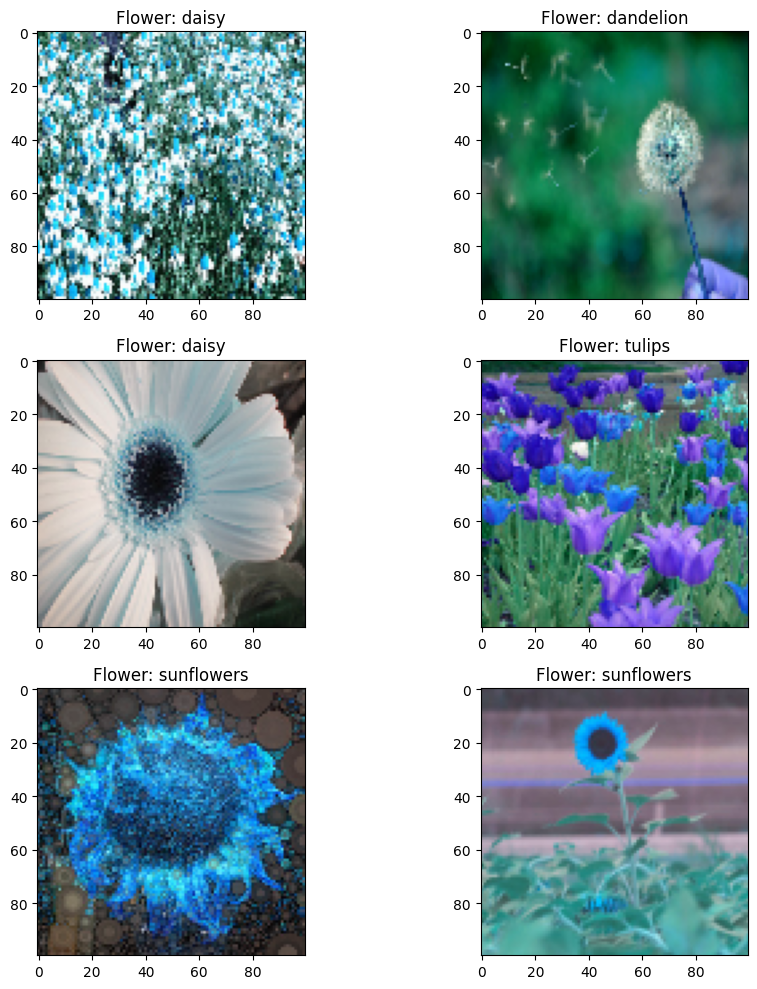

In [ ]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(10,10)
for i in range(3):
    for j in range(2):
        pict = rn.randint(0,len(Z))
        ax[i,j].imshow(X[pict])
        ax[i,j].set_title('Flower: '+Z[pict])

plt.tight_layout()

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, len(class_names))
X = np.array(X)
X = X/255


#### Split Dataset

In [ ]:
# Split data 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Dari 20% testing, 50% darinya untuk data validating
# X_val, X_test, y_val, y_test = train_test_split(X_temp_test, y_temp_test, test_size=0.5, random_state=42)

## Modelling

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(UKURAN_GAMBAR,UKURAN_GAMBAR,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0,5))
model.add(BatchNormalization(momentum=0.99))

model.add(Dense(len(class_names), activation = "softmax"))

In [ ]:
BESAR_EPOCH = 500
BESAR_BATCH = 24

In [ ]:
datagen = ImageDataGenerator(
        horizontal_flip = True,
        vertical_flip = True,
        rotation_range = 20,
        zoom_range = 0.2,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization = False,
        samplewise_std_normalization = False,
        zca_whitening = False,
        )

datagen.fit(X_train)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 100, 100, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 50, 50, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 25, 25, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 6, 6, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │         295,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 893,573 (3.41 MB)

 Trainable params: 893,445 (3.41 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.95 and logs.get('accuracy') > 0.95):
      print("\nAkurasi telah mencapai > 95%!")
      self.model.stop_training = True
callbacks_ku = myCallback()

checkpoint_ku = ModelCheckpoint('best_model.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, mode='min')

early_stopping_ku = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

In [35]:
History = model.fit(datagen.flow(X_train, y_train, batch_size=BESAR_BATCH),
                    epochs=BESAR_EPOCH,
                    validation_data=(X_test, y_test),
                    callbacks=[callbacks_ku, checkpoint_ku, early_stopping_ku],
                    verbose = 1,
                    steps_per_epoch = X_train.shape[0] // BESAR_BATCH)

Epoch 1/500
367/367 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.4965 - loss: 1.3996 - val_accuracy: 0.4873 - val_loss: 1.3038
Epoch 2/500
367/367 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.6110 - loss: 1.0384 - val_accuracy: 0.5309 - val_loss: 1.1586
Epoch 3/500
367/367 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.6554 - loss: 0.9316 - val_accuracy: 0.6658 - val_loss: 1.0046
Epoch 4/500
367/367 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.6651 - loss: 0.8852 - val_accuracy: 0.5604 - val_loss: 1.4580
Epoch 5/500
367/367 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.6855 - loss: 0.8483 - val_accuracy: 0.7216 - val_loss: 0.7569
Epoch 6/500
367/367 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.6985 - loss: 0.8179 - val_accuracy: 0.6994 - val_loss: 0.7902
Epoch 7/500
367/367 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.7052 - loss: 0.7884 - val_accuracy: 0.6962 - val_loss: 0.8414
Epoch 8/500
367/367 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.7064 - loss: 0

## Evaluasi dan Visualisasi

In [36]:
hasil_eval = model.evaluate(X_test, y_test, steps=BESAR_EPOCH)
print("Evaluasi Loss:", hasil_eval[0])
print("Evaluasi Accuracy:", hasil_eval[1])

500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9576 - loss: 0.1768
Evaluasi Loss: 0.15845048427581787
Evaluasi Accuracy: 0.9609445929527283


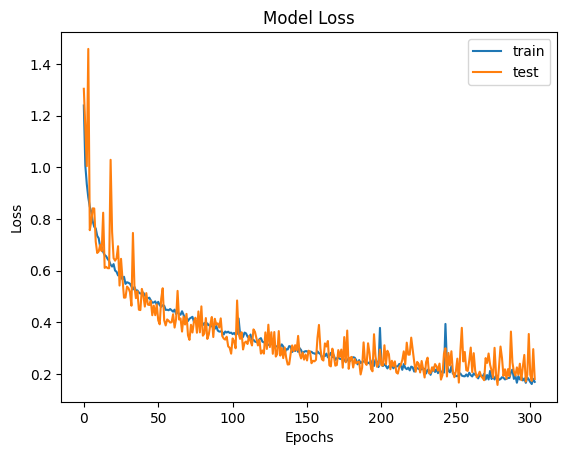

In [37]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

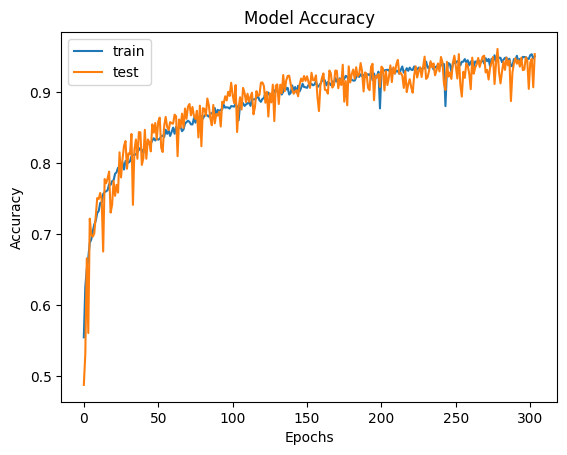

In [38]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Konversi Model

In [39]:
save_path = '/content/saved_model/'
tf.saved_model.save(model, save_path)

In [40]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_node_names='model.json' \
    --saved_model_tags=serve \
    /content/saved_model \
    /content/tfjs_model

2025-02-10 10:10:50.445466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739182250.614128   56188 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739182250.658488   56188 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-02-10 10:11:02.312524: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1739182262.315317   56188 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

In [41]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/saved_model')
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [42]:
!pip3 freeze > requirements.txt

## Inference (Optional)